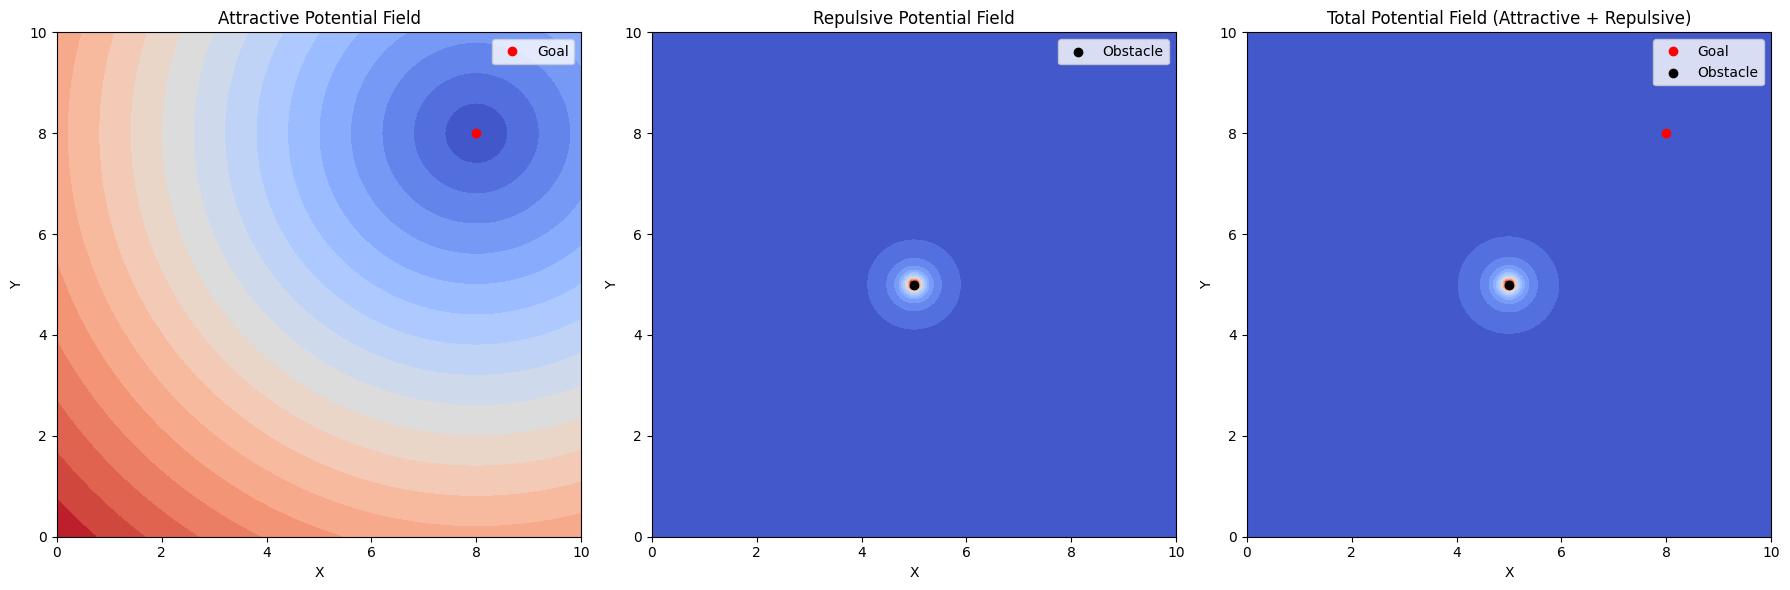

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# === Parameters ===
goal = np.array([8.0, 8.0])
obstacle_position = np.array([5.0, 5.0])
obstacle_radius = 1.0
robot_radius = 0.5
attractive_gain = 1.0  # Strength of the attractive field
repulsive_gain = 50.0  # Strength of the repulsive field
repulsive_radius = 3.0  # Distance beyond which obstacles no longer exert force

# Create a grid of points
x_vals = np.linspace(0, 10, 100)
y_vals = np.linspace(0, 10, 100)
X, Y = np.meshgrid(x_vals, y_vals)

# === Attractive Potential Field ===
def attractive_potential(x, y):
    """Attractive potential field towards the goal."""
    return attractive_gain * np.sqrt((x - goal[0])**2 + (y - goal[1])**2)

# === Repulsive Potential Field ===
def repulsive_potential(x, y):
    """Repulsive potential field around the obstacle."""
    distance_to_obstacle = np.sqrt((x - obstacle_position[0])**2 + (y - obstacle_position[1])**2)
    if distance_to_obstacle <= repulsive_radius:
        return repulsive_gain * (1 / distance_to_obstacle - 1 / repulsive_radius)
    else:
        return 0

# === Calculate Potential Fields ===
U_attractive = np.zeros_like(X)
U_repulsive = np.zeros_like(X)

# Compute potential fields for every grid point
for i in range(len(x_vals)):
    for j in range(len(y_vals)):
        U_attractive[i, j] = attractive_potential(X[i, j], Y[i, j])
        U_repulsive[i, j] = repulsive_potential(X[i, j], Y[i, j])

# === Total Potential Field ===
U_total = U_attractive + U_repulsive

# === Visualization ===
fig, ax = plt.subplots(1, 3, figsize=(18, 6))

# Attractive potential field
ax[0].contourf(X, Y, U_attractive, 20, cmap='coolwarm')
ax[0].plot(goal[0], goal[1], 'ro', label='Goal')
ax[0].set_title('Attractive Potential Field')
ax[0].set_xlabel('X')
ax[0].set_ylabel('Y')
ax[0].legend()

# Repulsive potential field
ax[1].contourf(X, Y, U_repulsive, 20, cmap='coolwarm')
ax[1].scatter(obstacle_position[0], obstacle_position[1], color='black', label='Obstacle')
ax[1].set_title('Repulsive Potential Field')
ax[1].set_xlabel('X')
ax[1].set_ylabel('Y')
ax[1].legend()

# Total potential field (combined)
ax[2].contourf(X, Y, U_total, 20, cmap='coolwarm')
ax[2].plot(goal[0], goal[1], 'ro', label='Goal')
ax[2].scatter(obstacle_position[0], obstacle_position[1], color='black', label='Obstacle')
ax[2].set_title('Total Potential Field (Attractive + Repulsive)')
ax[2].set_xlabel('X')
ax[2].set_ylabel('Y')
ax[2].legend()

plt.tight_layout()
plt.show()
